In [26]:
import numpy as np

environment_rows = 5
environment_cols = 5

# Creating a 3D numpy array to hold current Q-values for each state and action pair: Q(s, a)
# q_values = np.zeros((environment_rows, environment_cols, 4))

import numpy as np
class QTable:
    def __init__(self, environment_rows, environment_cols, num_actions, learning_rate, discount_factor):
        self.environment_rows = environment_rows
        self.environment_cols = environment_cols
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.q_table = np.zeros((environment_rows,environment_cols, num_actions))
    
    # Getting Q value at certain state and action
    def get_q_value(self, environment_rows, environment_cols, action):
        return self.q_table[environment_rows, environment_cols, action]
    
    # Updating Q table using the Bellman Equation
    def update_q_value(self, environment_rows, environment_cols, action, reward, next_row, next_col):
        current_q_value = self.q_table[environment_rows, environment_cols, action]
        max_next_q_value = np.max(self.q_table[next_row, next_col])
        new_q_value = (1 - self.learning_rate) * current_q_value + self.learning_rate * (reward + self.discount_factor * max_next_q_value)
        self.q_table[environment_rows, environment_cols, action] = new_q_value
    
    # Printing Q-table
    def print_q_table(self):
        print("Q-table:")
        print("State    |   N       E       S       W")
        print("----------------------------------------")
        for row in range(self.environment_rows):
            for col in range(self.environment_cols):
                print(f"({row},{col})   | ", end="")
                for action in actions:  # Iterate over 'actions' instead of 'self.num_actions'
                    action_idx = actions.index(action)
                    q_value_str = f"{self.q_table[row, col, action_idx]:.2f}"  
                    padding = max(0, 7 - len(q_value_str))  
                    print(" " * (padding // 2) + q_value_str + " " * ((padding + 1) // 2), end="")
                print()


# numeric action codes: 0 = N, 1 = E, 2  = S, 3 = W
actions = ['N', 'E', 'S','W']

In [27]:
# Defining environment
rewards = np.full((environment_rows, environment_cols), -1)

rewards[0,0] = 10
rewards[1,1] = -10
rewards[2,0] = -10

for row in rewards:
    print(row)

[10 -1 -1 -1 -1]
[ -1 -10  -1  -1  -1]
[-10  -1  -1  -1  -1]
[-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]


Note: Q-values represent our current estimate of the sum of all future rewards if we were to take a particular action in a particular state

In [35]:
# determines if specific location is a terminal state
def is_terminal(cur_row_idx, cur_col_idx):
    # if the reward is -1 then it is not a terminal state
    if rewards[cur_row_idx, cur_col_idx] == -1: return False
    else: return True

# Epsilon greedy algorithm that will choose which acion to take next
def get_next_action(q_values, cur_row_idx, cur_col_idx, epsilon):
    # if a randomly chosen value between 0 and 1 is less than epsilon, choose most promising value from Q-table for this state [90%]
    if np.random.random() < epsilon:
        return np.argmax(q_values.q_table[cur_row_idx, cur_col_idx])
    else: # choose random action for exploration
        return np.random.randint(4)
    
# Get next location based on chosen action
def get_next_location(cur_row_idx, cur_col_idx, action_idx):
    new_row_idx = cur_row_idx
    new_col_idx = cur_col_idx
    if actions[action_idx] == 'N' and cur_row_idx > 0:
        new_row_idx -= 1
    elif actions[action_idx] == 'E' and cur_col_idx < environment_cols - 1:
        new_col_idx += 1
    elif actions[action_idx] == 'S' and cur_row_idx < environment_rows - 1:
        new_row_idx += 1
    elif actions[action_idx] == 'W' and cur_col_idx > 0:
        new_col_idx -= 1
    return new_row_idx, new_col_idx

#Get the shortest path between any location within the space that the agent is allowed to travel and the item packaging location.
def get_shortest_path(q_values, start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
  if not is_terminal(start_row_index, start_column_index):  # Inverted the condition
        return []
  else: #if this is a 'legal' starting location
      current_row_index, current_column_index = start_row_index, start_column_index
      shortest_path = []
      shortest_path.append([current_row_index, current_column_index])
      #continue moving along the path until we reach the goal (i.e., the item packaging location)
      while not is_terminal(current_row_index, current_column_index):
          #get the best action to take
          action_index = get_next_action(q_values, current_row_index, current_column_index, 1.)
          #move to the next location on the path, and add the new location to the list
          current_row_index, current_column_index = get_next_location(q_values, current_row_index, current_column_index, action_index)
          shortest_path.append([current_row_index, current_column_index])
      return shortest_path
  
  #define a function that will choose a random, non-terminal starting location
def get_starting_location():
  #get a random row and column index
  current_row_index = np.random.randint(environment_rows)
  current_column_index = np.random.randint(environment_cols)
  #continue choosing random row and column indexes until a non-terminal state is identified
  #(i.e., until the chosen state is a 'white square').
  while is_terminal(current_row_index, current_column_index):
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_cols)
  return current_row_index, current_column_index

In [36]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn

q_values = QTable(environment_rows,environment_cols, 4, learning_rate,discount_factor)

#run through 1000 training episodes
for episode in range(1000):
  #get the starting location for this episode
  row_index, column_index = get_starting_location()

  #continue taking actions (i.e., moving) until we reach a terminal state
  #(i.e., until we reach the item packaging area or crash into an item storage location)
  while not is_terminal(row_index, column_index):
    #choose which action to take (i.e., where to move next)
    action_index = get_next_action(q_values, row_index, column_index, epsilon)

    #perform the chosen action, and transition to the next state (i.e., move to the next location)
    old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
    row_index, column_index = get_next_location(row_index, column_index, action_index)
    
    #receive the reward for moving to the new state, and calculate the temporal difference
    reward = rewards[row_index, column_index]
    # old_q_value = q_values[old_row_index, old_column_index, action_index]
    # temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

    #update the Q-value for the previous state and action pair
    # new_q_value = old_q_value + (learning_rate * temporal_difference)
    # q_values[old_row_index, old_column_index, action_index] = new_q_value
    q_values.update_q_value(old_row_index, old_column_index, action_index, reward, row_index, column_index)

print('Training complete!')

Training complete!


In [41]:
print(get_shortest_path(q_values, 4, 4))

[]


In [40]:
q_values.print_q_table()

Q-table:
State    |   N       E       S       W
----------------------------------------
(0,0)   |  0.00   0.00   0.00   0.00  
(0,1)   |  8.00   6.20  -10.00  10.00 
(0,2)   |  6.20   4.58   4.58   8.00  
(0,3)   |  4.58   3.07   3.12   6.20  
(0,4)   |  3.06   -3.14  1.31   4.58  
(1,0)   |  10.00  0.00   -9.00  7.20  
(1,1)   |  0.00   0.00   0.00   0.00  
(1,2)   |  6.20   3.12   3.12  -10.00 
(1,3)   |  4.52   1.38   1.44   4.58  
(1,4)   |  -3.14  1.37   0.63   3.12  
(2,0)   |  0.00   0.00   0.00   0.00  
(2,1)   |  -9.99  3.12   0.63  -10.00 
(2,2)   |  4.58   1.81   1.81   1.81  
(2,3)   |  3.12   0.63   0.63   3.12  
(2,4)   |  1.81   0.63   -0.43  1.81  
(3,0)   |  -9.00  0.63   -1.39  -0.47 
(3,1)   |  1.81   1.81   -0.43  -0.46 
(3,2)   |  3.12   0.63   0.59   0.62  
(3,3)   |  1.81   -0.47  -0.47  1.81  
(3,4)   |  0.63   -0.47  -1.39  0.63  
(4,0)   |  -0.43  -0.77  -1.42  -1.39 
(4,1)   |  0.63   -3.77  -3.86  -1.42 
(4,2)   |  1.81   -0.47  0.62   -0.77 
(4,3)   |  0.6

In [ ]:
# Printing Q-table
print("Q-table:")
print("State    |   N       E       S       W")
print("----------------------------------------")
for row in range(environment_rows):
    for col in range(environment_cols):
        print(f"({row},{col})   | ", end="")
        for action_idx, action in enumerate(actions):
            q_value_str = f"{q_values[row, col, action_idx]:.2f}"  # Convert Q-value to string
            padding = max(0, 7 - len(q_value_str))  # Calculate padding to center-align
            print(" " * (padding // 2) + q_value_str + " " * ((padding + 1) // 2), end="")
        print()  # Move to the next line for the next state


In [12]:
import numpy as np

class QTable:
    def __init__(self, num_states, num_actions, learning_rate=0.1, discount_factor=0.9):
        self.num_states = num_states
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.q_table = np.zeros((num_states, num_actions))

    def update_q_value(self, state, action, reward, next_state):
        current_q_value = self.q_table[state, action]
        max_next_q_value = np.max(self.q_table[next_state])
        new_q_value = (1 - self.learning_rate) * current_q_value + \
                      self.learning_rate * (reward + self.discount_factor * max_next_q_value)
        self.q_table[state, action] = new_q_value

    def get_q_value(self, state, action):
        return self.q_table[state, action]

    def update_learning_rate(self, new_learning_rate):
        self.learning_rate = new_learning_rate

    def update_discount_factor(self, new_discount_factor):
        self.discount_factor = new_discount_factor

    def get_optimal_action(self, state, exploration_rate):
        if np.random.rand() < exploration_rate:
            return np.random.randint(self.num_actions)  # Randomly choose an action
        else:
            return np.argmax(self.q_table[state])  # Choose action with maximum Q-value

class BlockTransportationProblem:
    def __init__(self, num_agents, num_states, num_actions, learning_rate, discount_factor):
        self.num_agents = num_agents
        self.num_states = num_states
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.q_tables = [QTable(num_states, num_actions, learning_rate, discount_factor) for _ in range(num_agents)]

    def update_q_values(self, agent_index, state, action, reward, next_state):
        self.q_tables[agent_index].update_q_value(state, action, reward, next_state)

    def select_action(self, agent_index, state, exploration_rate, policy):
        if policy == "PRANDOM":
            return np.random.randint(self.num_actions)  # Choose action randomly
        elif policy == "PEXPLOIT":
            return self.q_tables[agent_index].get_optimal_action(state, exploration_rate)
        elif policy == "PGREEDY":
            return np.argmax(self.q_tables[agent_index].q_table[state])  # Choose action with maximum Q-value

# Experiment parameters
num_agents = 3
num_states = 25  # Assuming 25 states
num_actions = 4  # Assuming 4 actions (north, south, east, west)
learning_rate = 0.3
discount_factor = 0.5
total_steps = 9000
initial_prandom_steps = 500
remaining_steps = total_steps - initial_prandom_steps
policy_switch_step = initial_prandom_steps

# Initialize Block Transportation Problem
btp = BlockTransportationProblem(num_agents, num_states, num_actions,learning_rate,discount_factor)

# Run PRANDOM for initial steps
for step in range(initial_prandom_steps):
    states = [np.random.randint(num_states) for _ in range(num_agents)]
    actions = [btp.select_action(agent_index, state, exploration_rate=1.0, policy="PRANDOM") for agent_index, state in enumerate(states)]
    rewards = [np.random.randint(10) for _ in range(num_agents)]  # Random rewards for demonstration
    next_states = [np.random.randint(num_states) for _ in range(num_agents)]
    for agent_index in range(num_agents):
        btp.update_q_values(agent_index, states[agent_index], actions[agent_index], rewards[agent_index], next_states[agent_index])

# Switch policies and continue running
for step in range(policy_switch_step, total_steps):
    policy = "PGREEDY" if step < (total_steps - remaining_steps // 2) else "PEXPLOIT"
    exploration_rate = 0.1 if policy == "PEXPLOIT" else 1.0
    states = [np.random.randint(num_states) for _ in range(num_agents)]
    actions = [btp.select_action(agent_index, state, exploration_rate, policy) for agent_index, state in enumerate(states)]
    rewards = [np.random.randint(10) for _ in range(num_agents)]  # Random rewards for demonstration
    next_states = [np.random.randint(num_states) for _ in range(num_agents)]
    for agent_index in range(num_agents):
        btp.update_q_values(agent_index, states[agent_index], actions[agent_index], rewards[agent_index], next_states[agent_index])

final_states = [np.random.randint(num_states) for _ in range(num_agents)]

policy = "PEXPLOIT"
final_q_table = btp.q_tables[0].q_table  # Assuming agents have the same Q-table


In [16]:
print(final_q_table)
print(final_states)

[[ 8.01220137  6.13672674  6.98778214  7.01159269]
 [ 6.78404457  6.7250203  10.64233301  6.74363573]
 [ 7.33714983  7.04439873  8.31434864  7.3339964 ]
 [ 7.4553789   7.70668007  6.47870605  6.67849751]
 [ 6.04543445  7.70939295 11.0050168   7.55708811]
 [ 5.70530482  6.63762718  9.99809517  6.33906805]
 [ 6.89203772  7.76551332  6.08185066  6.69126486]
 [ 6.23086194  7.14428195  5.98611037  8.47341871]
 [ 8.52057004  7.32477045  5.00039369  7.7302224 ]
 [ 7.34850834  8.22849181  7.34694474  7.07894112]
 [10.14615783  6.04667622  6.98903834  6.71591524]
 [ 6.18634053  6.64962803  7.443523    6.77777683]
 [ 6.51301253  6.80196149  7.78394682  6.72176276]
 [ 7.14300627  6.72583059  7.27185197 10.22577046]
 [ 6.03654291  5.71617141  6.21732942 11.81857238]
 [ 5.98059047  6.12271529  6.617482    6.44049571]
 [ 7.75175476 11.50857413  6.66740874  6.93831157]
 [ 6.51035958  8.86283463  9.30986562  7.1339123 ]
 [ 5.66532844  6.28788866  8.26787125  9.98940664]
 [ 5.98188348  6.44886821  7.71

In [45]:
import numpy as np

q_values = np.array([
    [[  0,   80,   90,   80],
     [ 70,   90,   90,   70],
     [ 80,   90,   90,   80],
     [ 70,   90,   80,   70],
     [ 80,   90,   90,  100]],

    [[ 80,   90,   90,   70],
     [ 80,   90,   90,   70],
     [ 70,   90,   90,   70],
     [ 70,   90,   80,   80],
     [ 80,   80,   90,   70]],

    [[ 80,   90,   80,   90],
     [ 90,   90,   90,   80],
     [ 70,   90,   80,   80],
     [ 80,   80,   80,   90],
     [ 80,   80,   90,   70]],

    [[ 80,   90,   90,   80],
     [ 90,   80,   80,   90],
     [ 90,   80,   90,   80],
     [ 70,   80,   90,   80],
     [ 80,   80,   90,   70]],

    [[ 90,   90,   90,   90],
     [ 90,   90,   90,   90],
     [ 90,   90,   90,   90],
     [ 90,   90,   90,   90],
     [ 70,   80,   90,   70]]])

row = 0
col = 0
path = [(row, col)]
while not (row == 4 and col == 4):
    print("Current position:", row, col)
    print("Q-values:", q_values[row, col])
    max_q_value = np.max(q_values[row, col])
    print(max_q_value)
    # idx = np.argwhere(q_values[row, col] == max_q_value)
    idx = np.argmax(q_values[row, col])
    print("Indexes with maximum Q-value:", idx)
    if idx >= 0:
        # numeric action codes: 0 = N, 1 = E, 2  = S, 3 = W
        if idx == 0:
            row -= 1
        elif idx == 1:
            col += 1
        elif idx == 2:
            row += 1
        elif idx == 3:
            col -= 1
        else:
            print("Error in direction")
            break
        if row > 4 or row < 0 or col < 0 or col > 4:
            print("Out of bounds")
            break
        else:
            path.append((row, col))
    else:
        print("No maximum Q-value found")
        break

print("Path:", path)
           

Current position: 0 0
Q-values: [ 0 80 90 80]
90
Indexes with maximum Q-value: 2
Current position: 1 0
Q-values: [80 90 90 70]
90
Indexes with maximum Q-value: 1
Current position: 1 1
Q-values: [80 90 90 70]
90
Indexes with maximum Q-value: 1
Current position: 1 2
Q-values: [70 90 90 70]
90
Indexes with maximum Q-value: 1
Current position: 1 3
Q-values: [70 90 80 80]
90
Indexes with maximum Q-value: 1
Current position: 1 4
Q-values: [80 80 90 70]
90
Indexes with maximum Q-value: 2
Current position: 2 4
Q-values: [80 80 90 70]
90
Indexes with maximum Q-value: 2
Current position: 3 4
Q-values: [80 80 90 70]
90
Indexes with maximum Q-value: 2
Path: [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


C:\Users\rsond\AppData\Local\Temp\ipykernel_13004\3526885969.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 3)


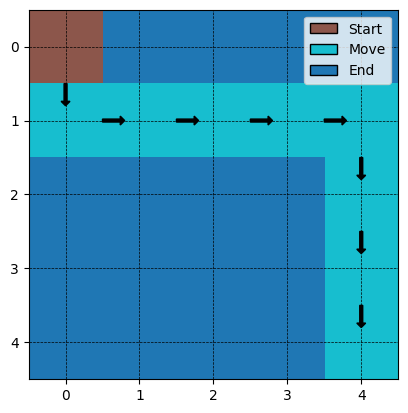

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the grid size
GRID_SIZE = 5

# Function to visualize the agent's path
def visualize_path(path):
    # Create a grid
    grid = np.zeros((GRID_SIZE, GRID_SIZE))

    # Mark starting point
    start = path[0]
    grid[start[0], start[1]] = 1

    # Mark ending point
    end = path[-1]
    grid[end[0], end[1]] = 2

    # Draw arrows and color cells
    for i in range(1, len(path)):
        prev_state = path[i-1]
        curr_state = path[i]
        dx = curr_state[1] - prev_state[1]
        dy = curr_state[0] - prev_state[0]
        if dx == 1:
            arrow = patches.Arrow(curr_state[1] - 0.5, curr_state[0], 0.3, 0, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dx == -1:
            arrow = patches.Arrow(curr_state[1] + 0.5, curr_state[0], -0.3, 0, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dy == 1:
            arrow = patches.Arrow(curr_state[1], curr_state[0] - 0.5, 0, 0.3, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dy == -1:
            arrow = patches.Arrow(curr_state[1], curr_state[0] + 0.5, 0, -0.3, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3

    # Set colors for visualization
    cmap = plt.cm.get_cmap('tab10', 3)

    # Visualize the grid
    plt.imshow(grid, cmap=cmap, interpolation='nearest')

    # Add gridlines
    plt.grid(visible=True, color='black', linestyle='--', linewidth=0.5)

    # Add legend
    legend_elements = [patches.Patch(facecolor=cmap(1), edgecolor='black', label='Start'),
                       patches.Patch(facecolor=cmap(2), edgecolor='black', label='Move'),
                       patches.Patch(facecolor=cmap(0), edgecolor='black', label='End')]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.show()

# Example path
# example_path = [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2)]
example_path = [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]
visualize_path(example_path)


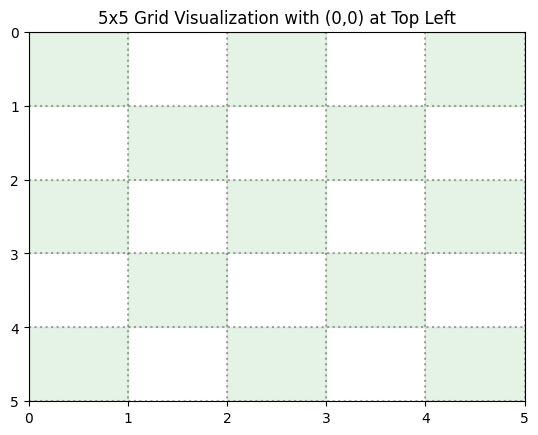

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define a 5x5 grid
xs = np.linspace(0, 5, 6)  # 6 points for 5 boxes
ys = np.linspace(0, 5, 6)  # 6 points for 5 boxes
ax = plt.gca()

# Calculate width and height of each grid box
w, h = xs[1] - xs[0], ys[1] - ys[0]

# Add rectangles to the grid in a checkerboard pattern
for i, x in enumerate(xs[:-1]):
    for j, y in enumerate(ys[:-1]):
        if (i + j) % 2 == 0:  # racing flag style, checkerboard pattern
            ax.add_patch(Rectangle((x, y), w, h, fill=True, color='#008610', alpha=.1))

# Draw grid lines
for x in xs:
    plt.plot([x, x], [ys[0], ys[-1]], color='black', alpha=.33, linestyle=':')
for y in ys:
    plt.plot([xs[0], xs[-1]], [y, y], color='black', alpha=.33, linestyle=':')

# Set axis limits and invert the y-axis to make (0,0) the top left
plt.xlim(xs[0], xs[-1])
plt.ylim(ys[0], ys[-1])
ax.invert_yaxis()

plt.title("5x5 Grid Visualization with (0,0) at Top Left")
plt.show()
